✅ Objetivos do Colab: -> DADOS_2023_2024.csv

📊 Fazer análise descritiva dos dados

📅 Extrair insights de tempo (mês, dia da semana, total por data)

🛍️ Descobrir os produtos mais vendidos

📈 Visualizar com gráficos bonitos e explicativos

☁️ Gerar uma nuvem de palavras com as descrições dos produtos

In [1]:
# ✅ Instalar bibliotecas extras
!pip install wordcloud seaborn --quiet

# === 1. Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files

# === 2. Upload do CSV
print("📂 Faça upload do arquivo CSV com dados de vendas:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

📂 Faça upload do arquivo CSV com dados de vendas:


Saving DADOS_2023_2024.csv to DADOS_2023_2024.csv


In [2]:
# === 3. Leitura dos dados
df = pd.read_csv(file_name)
df['DT_VENDA'] = pd.to_datetime(df['DT_VENDA'], errors='coerce', dayfirst=True)

# === 4. Mostrar primeiras linhas
print("🧾 Primeiros registros:")
display(df.head())

# === 5. Criar colunas de data (mês, dia da semana)
df['mes'] = df['DT_VENDA'].dt.month_name()
df['dia_semana'] = df['DT_VENDA'].dt.day_name()

🧾 Primeiros registros:


/tmp/ipython-input-2-2427304749.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DT_VENDA'] = pd.to_datetime(df['DT_VENDA'], errors='coerce', dayfirst=True)


,DT_VENDA,CD_PRODUTO,DS_PRODUTO,UND_MED,QTD_SAIDA
0,2023-02-22,27090,REFRIG COCA COLA PET 2L,UN,135
1,2023-02-26,225,COXA/SOBREC C/DORSO PCTAO KG,KG,99
2,2023-05-10,225,COXA/SOBREC C/DORSO PCTAO KG,KG,388
3,2023-05-02,53056,SABON PALMOLIVE 85G HIDR INTENSIVA,UN,27
4,2023-02-07,53056,SABON PALMOLIVE 85G HIDR INTENSIVA,UN,41


In [3]:
# === 6. Insight 1: Produto mais vendido
mais_vendidos = df.groupby('DS_PRODUTO')['QTD_SAIDA'].sum().sort_values(ascending=False)
print("🏆 Produtos mais vendidos:")
display(mais_vendidos.head())

# === 7. Insight 2: Total vendido por mês
vendas_por_mes = df.groupby('mes')['QTD_SAIDA'].sum().sort_values(ascending=False)
print("📆 Total vendido por mês:")
display(vendas_por_mes)

# === 8. Insight 3: Dia da semana com mais vendas
vendas_dia_semana = df.groupby('dia_semana')['QTD_SAIDA'].sum().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
print("📅 Vendas por dia da semana:")
display(vendas_dia_semana)

🏆 Produtos mais vendidos:


,QTD_SAIDA
DS_PRODUTO,
REFRIG COCA COLA PET 2L,883950
PAO FRANCES,212288
COXA/SOBREC C/DORSO PCTAO KG,208001
OLEO SOJA COAMO PET 900ML,192333
OVO GAL LOCKS BJ C/30 PLAST,147662


📆 Total vendido por mês:


,QTD_SAIDA
mes,
May,198327
October,191722
January,186817
December,178167
February,172992
March,169336
November,159533
August,142471
September,142425


📅 Vendas por dia da semana:


,QTD_SAIDA
dia_semana,
Monday,256284
Tuesday,473115
Wednesday,233125
Thursday,269220
Friday,303418
Saturday,290639
Sunday,101691


/tmp/ipython-input-4-2974905041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mais_vendidos.head(5).values, y=mais_vendidos.head(5).index, palette="viridis")


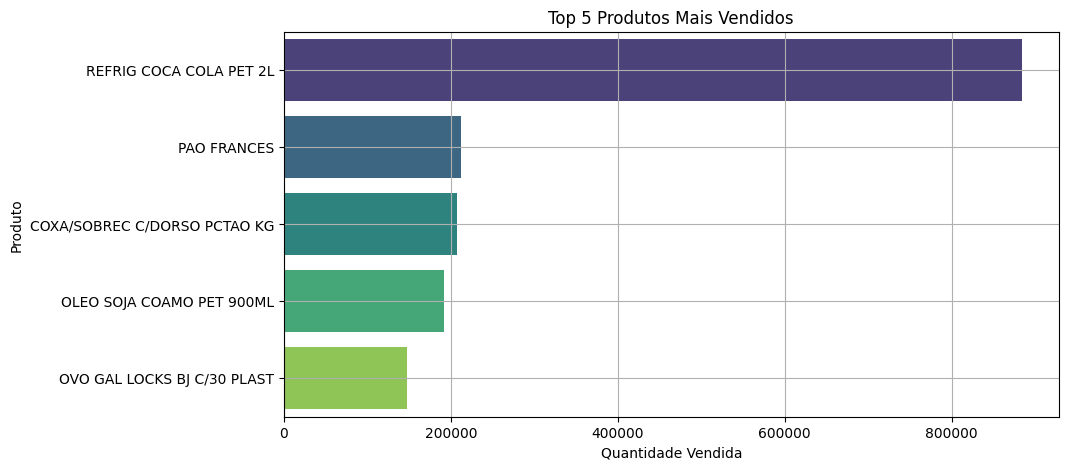

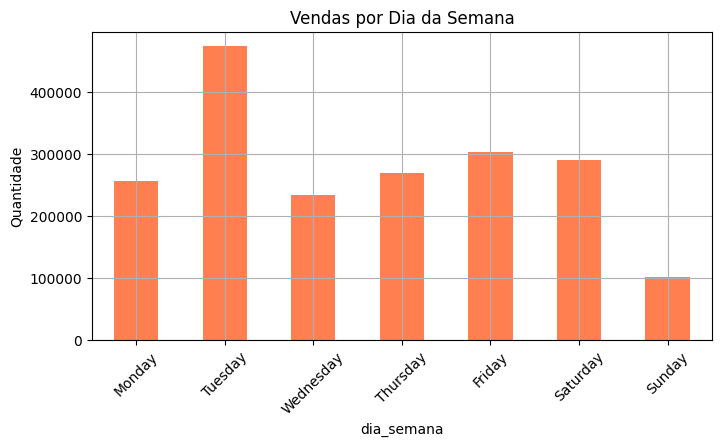

In [4]:
# === 9. Gráfico: Produtos mais vendidos
plt.figure(figsize=(10,5))
sns.barplot(x=mais_vendidos.head(5).values, y=mais_vendidos.head(5).index, palette="viridis")
plt.title("Top 5 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.grid(True)
plt.show()

# === 10. Gráfico: Vendas por dia da semana
plt.figure(figsize=(8,4))
vendas_dia_semana.plot(kind='bar', color='coral')
plt.title("Vendas por Dia da Semana")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


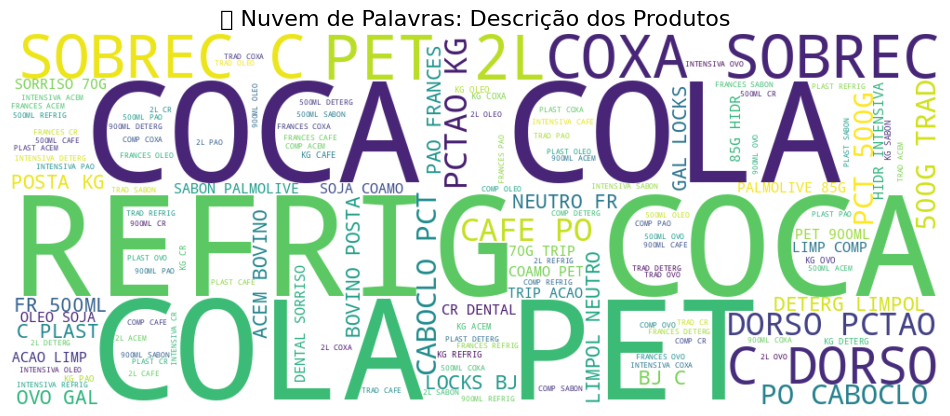

In [6]:
# === 11. Nuvem de Palavras
texto = " ".join(df['DS_PRODUTO'].astype(str).tolist())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(texto)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🟦 Nuvem de Palavras: Descrição dos Produtos", fontsize=16)
plt.show()

